# Transferencia Radiativa

# Estudiante: Jefferson Alexander Romero Márquez

# Cálculo del Ángulo Cenital Solar

El ángulo cenital solar $(\zeta)$ es el ángulo entre el Sol y la vertical (directamente sobre el observador).

Para calcular el ángulo cenital solar se requieren los siguientes datos:

- Latitud $(l)$: Coordenada geográfica del observador (Se ingresa en grados pero luego se convierte a radianes).
- Declinación solar $(\Delta)$: Ángulo entre los rayos solares y el plano ecuatorial terrestre (radianes).
- Ángulo horario $(H)$: Depende de la hora solar (Se calcula en grados pero luego se convierte a radianes).

El ángulo cenital solar  $(\zeta)$ se calcula usando la ecuación:

$$\cos \zeta = \sin(l) \cdot \sin(\Delta) + \cos(l) \cdot \cos(\Delta) \cdot \cos(H)$$

La declinación solar $(\Delta)$ varía con el día del año y se puede aproximar mediante la ecuación:

$$\Delta = 0.006918 - 0.399912 \cos(\Gamma) + 0.070257 \sin(\Gamma) - 0.006758 \cos(2\Gamma) + 0.000907 \sin(2\Gamma)$$

Donde:

$$\Gamma = \frac{2\pi}{365} \cdot (J - 1)$$

- $(J$): Día juliano.
- $(\Delta)$: Se calcula en radianes.

El ángulo horario $(H)$ está relacionado con el Tiempo Solar Verdadero $(TST)$ mediante la ecuación:

$$H = 15 \cdot (12 - TST)$$

Para usar $(H)$ en la fórmula del ángulo cenital, se convierte $(H)$ de grados a radianes:

$$H = H \cdot \frac{\pi}{180}$$

Donde:

$$TST = UT + 4L + ET$$

- $(TST)$: Tiempo Solar Verdadero (en horas).
- $(UT)$: Tiempo Universal (en horas).
- $(L)$: Longitud geográfica del observador (en grados; positiva al este y negativa al oeste).
- $(ET)$: Ecuación del tiempo (en minutos, luego se convierte a horas).

La ecuación del tiempo $(ET)$ se calcula mediante:

$$ET = 229.18 \cdot \left( 0.000075 + 0.001868 \cos(\Gamma) - 0.032077 \sin(\Gamma) - 0.014615 \cos(2\Gamma) - 0.040849 \sin(2\Gamma) \right)$$

El resultado de $(ET)$ se obtiene en minutos y debe convertirse a horas para los cálculos de $(TST)$:

$$ET = \frac{ET}{60}$$

In [1]:
import numpy as np

# Funciones

In [2]:
def SZA():
    while True:
        try:  
            año=int(input('Ingrese el año (1900-2100): '))
            if año<1900 or año>2100:
                print('Ingrese un número en el rango establecido')
                continue
            if (año % 4 == 0 and año % 100 != 0) or (año % 400 == 0):
                print('Considere que el año es bisiesto')
                febrero=29
                break
            else:
                print('El año no es bisiesto')
                febrero=28
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    while True:
        try:  
            mes=int(input('Ingrese el mes (1-12): '))
            if mes<1 or mes>12:
                print('Ingrese un número en el rango establecido')
                continue
            else:
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    while True:
        dia_31=[1,3,5,7,8,10,12]
        dia_30=[4,6,9,11]   
        if mes in dia_31:
            try: 
                dia=int(input('Ingrese el dia (1-31): '))
                if dia<1 or dia>31:
                    print('Ingrese un número en el rango establecido')
                    continue
                else:
                    break
            except ValueError:
                print('El valor ingresado no tiene el formato correcto, intente nuevamente')
                continue
        elif mes in dia_30:
            try: 
                dia=int(input('Ingrese el dia (1-30): '))
                if dia<1 or dia>30:
                    print('Ingrese un número en el rango establecido')
                    continue
                else:
                    break
            except ValueError:
                print('El valor ingresado no tiene el formato correcto, intente nuevamente')
                continue
        else:
            try: 
                dia=int(input(f'Ingrese el dia (1-{febrero}): '))
                if dia<1 or dia>febrero:
                    print('Ingrese un número en el rango establecido')
                    continue
                else:
                    break
            except ValueError:
                print('El valor ingresado no tiene el formato correcto, intente nuevamente')
                continue
    print(f'La fecha ingresada es: {dia}/{mes}/{año}')
    meses=[31,febrero,31,30,31,30,31,31,30,31,30,31]
    dia_juliano=sum(meses[:mes-1])+dia
    print(f'El día juliano es: {dia_juliano}')
    while True:
        try:  
            latitud=float(input('Ingrese la latitud en grados (positiva al norte y negativa al sur): '))
            if latitud<-90 or latitud>90:
                print('Ingrese un número en el rango establecido')
                continue
            else:
                latitud=latitud*(np.pi/180)
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    while True:
        try:  
            longitud=float(input('Ingrese la longitud en grados (positiva al este y negativa al oeste): '))
            if longitud<-180 or longitud>180:
                print('Ingrese un número en el rango establecido')
                continue
            else:
                longitud=longitud/60
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    while True:
        try:  
            hora=int(input('Ingrese la hora (0-23): '))
            if hora<0 or hora>23:
                print('Ingrese un número en el rango establecido')
                continue
            else:
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    while True:
        try:  
            minutos=int(input('Ingrese los minutos (0-59): '))
            if minutos<0 or minutos>59:
                print('Ingrese un número en el rango establecido')
                continue
            else:
                break
        except ValueError:
            print('El valor ingresado no tiene el formato correcto, intente nuevamente')
            continue
    UT=hora+(minutos/60)
    factor=(2*np.pi/365)*(dia_juliano-1)
    declinacion=0.006918-0.399912*np.cos(factor)+0.070257*np.sin(factor)-0.006758*np.cos(2*factor)+0.000907*np.sin(2*factor)
    ET=229.18*(0.000075+0.001868*np.cos(factor)-0.032077*np.sin(factor)-0.014615*np.cos(2*factor)-0.040849*np.sin(2*factor))
    ET=ET/60
    TST=UT+(4*longitud)+ET
    H=15*(12-TST)
    H=H*(np.pi/180)
    sza=(np.sin(latitud)*np.sin(declinacion))+(np.cos(latitud)*np.cos(declinacion)*np.cos(H))
    sza=np.arccos(sza)
    sza=sza*(180/np.pi)
    sza=round(sza,3)
    if sza>90:
        sza=90
    print(f'El ángulo cenital solar (sza) es: {sza}°')

In [3]:
def SZA_Sencilla(dia_juliano,latitud,longitud,hora, minutos):
    latitud=latitud*(np.pi/180)
    longitud=longitud/60
    UT=hora+(minutos/60)
    factor=(2*np.pi/365)*(dia_juliano-1)
    declinacion=0.006918-0.399912*np.cos(factor)+0.070257*np.sin(factor)-0.006758*np.cos(2*factor)+0.000907*np.sin(2*factor)
    ET=229.18*(0.000075+0.001868*np.cos(factor)-0.032077*np.sin(factor)-0.014615*np.cos(2*factor)-0.040849*np.sin(2*factor))
    ET=ET/60
    TST=UT+(4*longitud)+ET
    H=15*(12-TST)
    H=H*(np.pi/180)
    sza=(np.sin(latitud)*np.sin(declinacion))+(np.cos(latitud)*np.cos(declinacion)*np.cos(H))
    sza=np.arccos(sza)
    sza=sza*(180/np.pi)
    sza=round(sza,3)
    if sza>90:
        sza=90
    print(f'El ángulo cenital solar (sza) es: {sza}°')

# Ejecución

Función SZA(): Esta función permite calcular el ángulo cenital solar de manera interactiva, solicitando al usuario ingresar los parámetros necesarios. 

Función SZA_Sencilla(dia_juliano, latitud, longitud, hora, minutos): Esta función permite calcular el ángulo cenital solar directamente, sin interacción con el usuario, pasando los parámetros como argumentos. 

Si consideramos el día 1/12/2024 (336 día juliano), la latitud de 41.66, la longitud de -4.7 y la hora de 14:30 (como se muestra en la imagen del Ssolar_GOA, que será usada para corroborar los cálculos) las funciones se llaman como los ejemplos de las dos celdas siguientes.

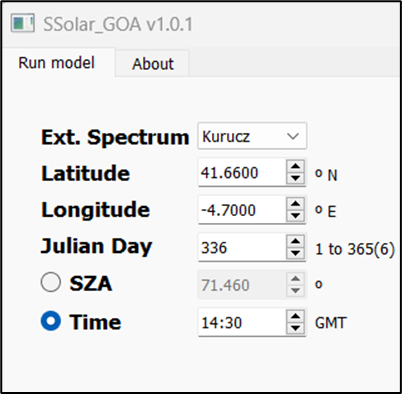

In [4]:
SZA()

Ingrese el año (1900-2100): 2024
Considere que el año es bisiesto
Ingrese el mes (1-12): 12
Ingrese el dia (1-31): 1
La fecha ingresada es: 1/12/2024
El día juliano es: 336
Ingrese la latitud en grados (positiva al norte y negativa al sur): 41.66
Ingrese la longitud en grados (positiva al este y negativa al oeste): -4.7
Ingrese la hora (0-23): 14
Ingrese los minutos (0-59): 30
El ángulo cenital solar (sza) es: 71.381°


In [5]:
SZA_Sencilla(336,41.66,-4.7,14,30)

El ángulo cenital solar (sza) es: 71.381°
